## BoomBikes - Demand Predictions
### Business Objective 

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 01. Data Import

Let's import the required library , dataset and have a look at the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Load the dataset
days= pd.read_csv('day.csv')

In [4]:
## Let's have a look at the first few rows
days.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
## Dimension of the dataset
days.shape

(730, 16)

In [6]:
## Total 730 rows X 16 cols , with no NULL values
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [7]:
## Check for missing values
days.isnull().sum()>0

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

## 02. Data Understanding and Exploration

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Season  - 1: spring , 2: summer ,3:fall ,4:winter 

In [8]:
## Season - 1: spring , 2: summer ,3:fall ,4:winter 
## It looks this is appearing as the Ordinal variable , however there is no clear order visible for the season.
## Let's have a look at this.
days.season.astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
## It makes more sense to convert season to categorical variable by assigning the string values
## Please refer to this https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/
days.season=days.season.astype(str)
days.season=days.season.map({'1':'spring', '2':'summer','3':'fall', '4':'winter'})
days.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
## Similarly for the variable weathersit is appearing as an Ordinal variable , however there is not clear order visible
## Let's convert it to the categorical variable
days.weathersit.astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
## Looks like there is no demand for bikes during the extreme weathers
days.weathersit=days.weathersit.astype(str)
days.weathersit=days.weathersit.map({'1':'Clear', '2':'Mist and Cloudy','3':'Light and Snow Rain', '4':'Heavy and snow Rain'})
days.weathersit.astype('category').value_counts()

Clear                  463
Mist and Cloudy        246
Light and Snow Rain     21
Name: weathersit, dtype: int64

#### mnth : month ( 1 to 12)

In [12]:
## Since mnth is clearly a categorical variable and Let's put an appropriate string value to it
days.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
days.mnth=days.mnth.map({1:'Jan',
                                 2:'Feb',
                                 3:'March',
                                 4:'April',
                                 5:'May',
                                 6:'June',
                                 7:'July',
                                 8:'Aug',
                                 9:'Sep',
                                 10:'Oct',
                                 11:'Nov',
                                 12:'Dec'})
days.mnth.value_counts()

Aug      62
Oct      62
Dec      62
Jan      62
May      62
March    62
July     62
June     60
April    60
Nov      60
Sep      60
Feb      56
Name: mnth, dtype: int64

#### weekday : day of the week

In [14]:
## Since weekday is clearly a categorical variable and Let's put an appropriate string value to it
days.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [15]:
days.weekday =days.weekday.map({1:'Monday',
                                       2:'Tuesday',
                                       3:'Wednesday',
                                       4:'Thrusday',
                                       5:'Friday',
                                       6:'Saturday',
                                       0:'Sunday',})
days.weekday.value_counts()

Sunday       105
Monday       105
Saturday     105
Friday       104
Thrusday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

#### yr : year (0: 2018, 1:2019)

In [16]:
## yr: since this is given in 0 : 2018 and 1 : 2019 . Let's leave it alone
days.yr.astype('category').value_counts()


1    365
0    365
Name: yr, dtype: int64

#### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.


In [17]:
days.workingday.astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

#### holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

In [18]:
## Let's have a look at the holiday and working days too.
days.holiday.astype('category').value_counts()


0    709
1     21
Name: holiday, dtype: int64

## Data visualization for all the categorical variables

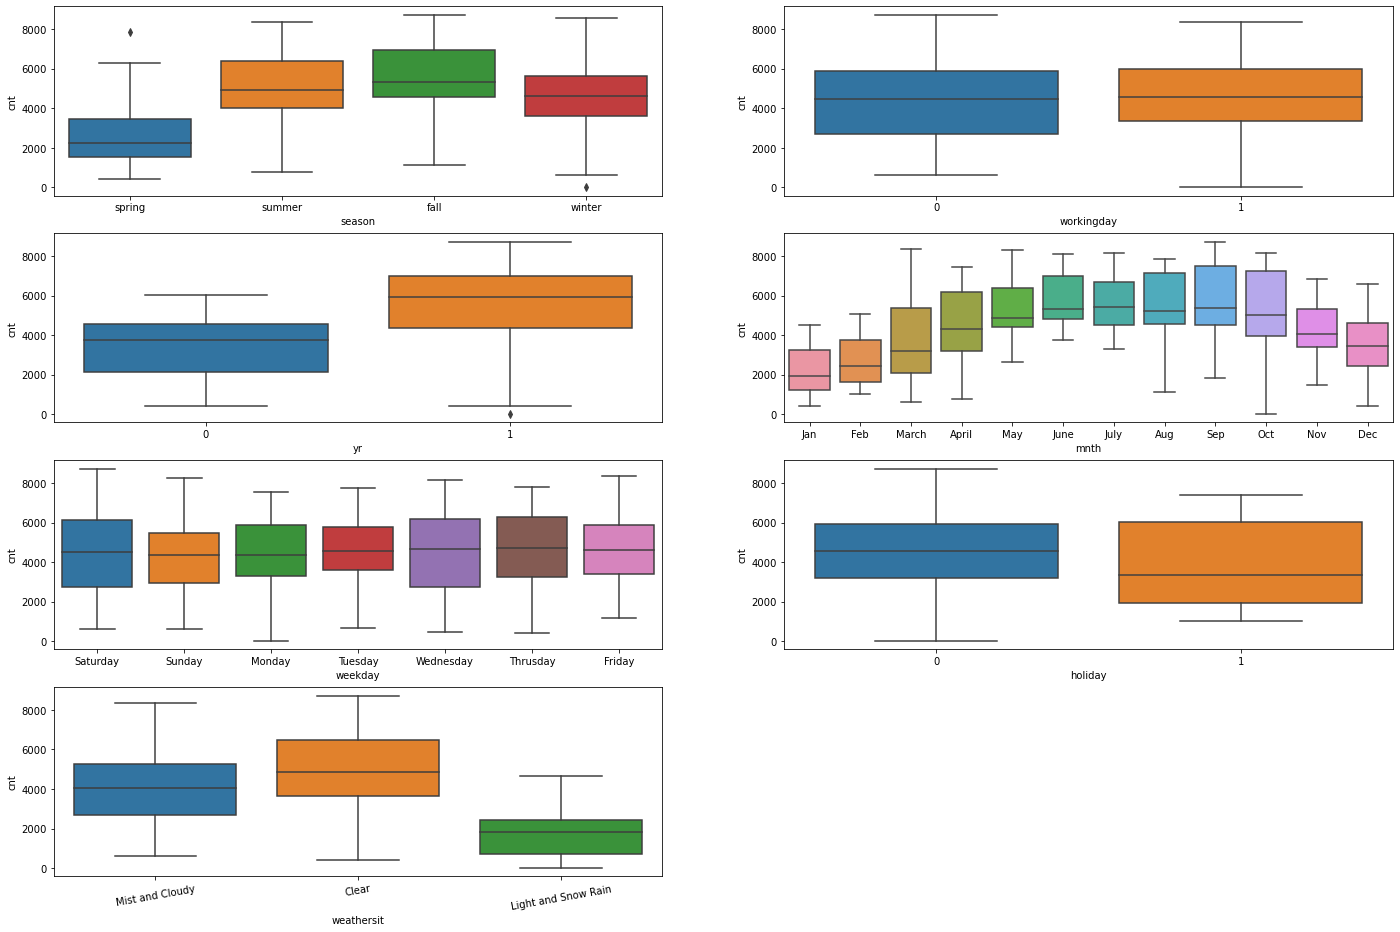

In [19]:
## Lets visualize all the categorical/ordinal variables
plt.figure(figsize=(24, 16))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = days)
plt.subplot(4,2,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = days)
plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = days)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = days)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = days)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = days)
plt.subplot(4,2,7)
ax=sns.boxplot(x = 'weathersit', y = 'cnt', data = days)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

#### temp : temperature in Celsius

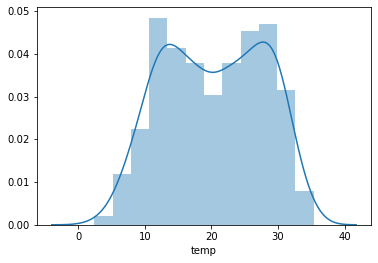

In [20]:
sns.distplot(days['temp'])
plt.show()

#### atemp: feeling temperature in Celsius


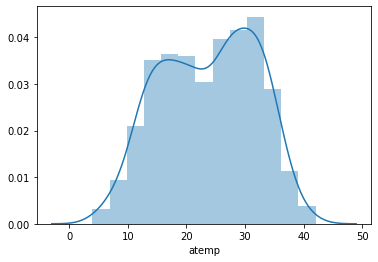

In [21]:
sns.distplot(days['atemp'])
plt.show()

#### hum: humidity

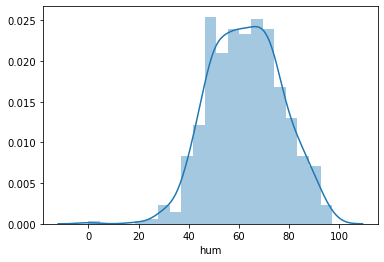

In [22]:
sns.distplot(days['hum'])
plt.show()

#### windspeed: wind speed

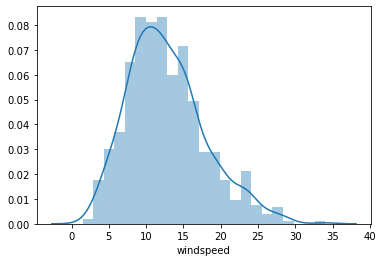

In [23]:
sns.distplot(days['windspeed'])
plt.show()

#### casual: count of casual users

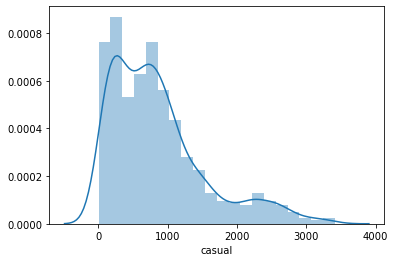

In [24]:
sns.distplot(days['casual'])
plt.show()

#### registered: count of registered users

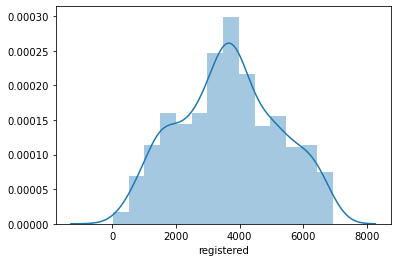

In [25]:
sns.distplot(days['registered'])
plt.show()

### Target variable -  cnt: count of total rental bikes including both casual and registered

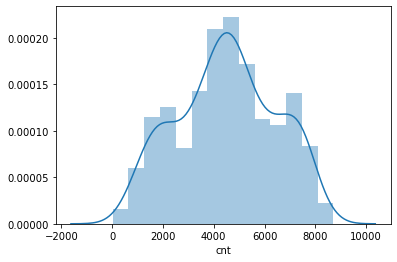

In [26]:
sns.distplot(days['cnt'])
plt.show()

In [27]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 77.1+ KB


### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.


In [28]:
## All numeric variables in dataset
days_numeric = days.select_dtypes(include=['float64', 'int64'])
days_numeric.head()

instant  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0        1   0        0           0  14.110847  18.18125  80.5833  10.749882   
1        2   0        0           0  14.902598  17.68695  69.6087  16.652113   
2        3   0        0           1   8.050924   9.47025  43.7273  16.636703   
3        4   0        0           1   8.200000  10.60610  59.0435  10.739832   
4        5   0        0           1   9.305237  11.46350  43.6957  12.522300   

   casual  registered   cnt  
0     331         654   985  
1     131         670   801  
2     120        1229  1349  
3     108        1454  1562  
4      82        1518  1600

In [29]:
## Since instant isn't of any use to build linear regression model. Let's drop it.
## yr, holiday , workingday are binary variable .Let's drop them too.
days_numeric=days_numeric.drop('instant',axis=1,)
days_numeric.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600

#### Let's draw a pairwise scatter plot and observe the linear relationship

<Figure size 1440x720 with 0 Axes>

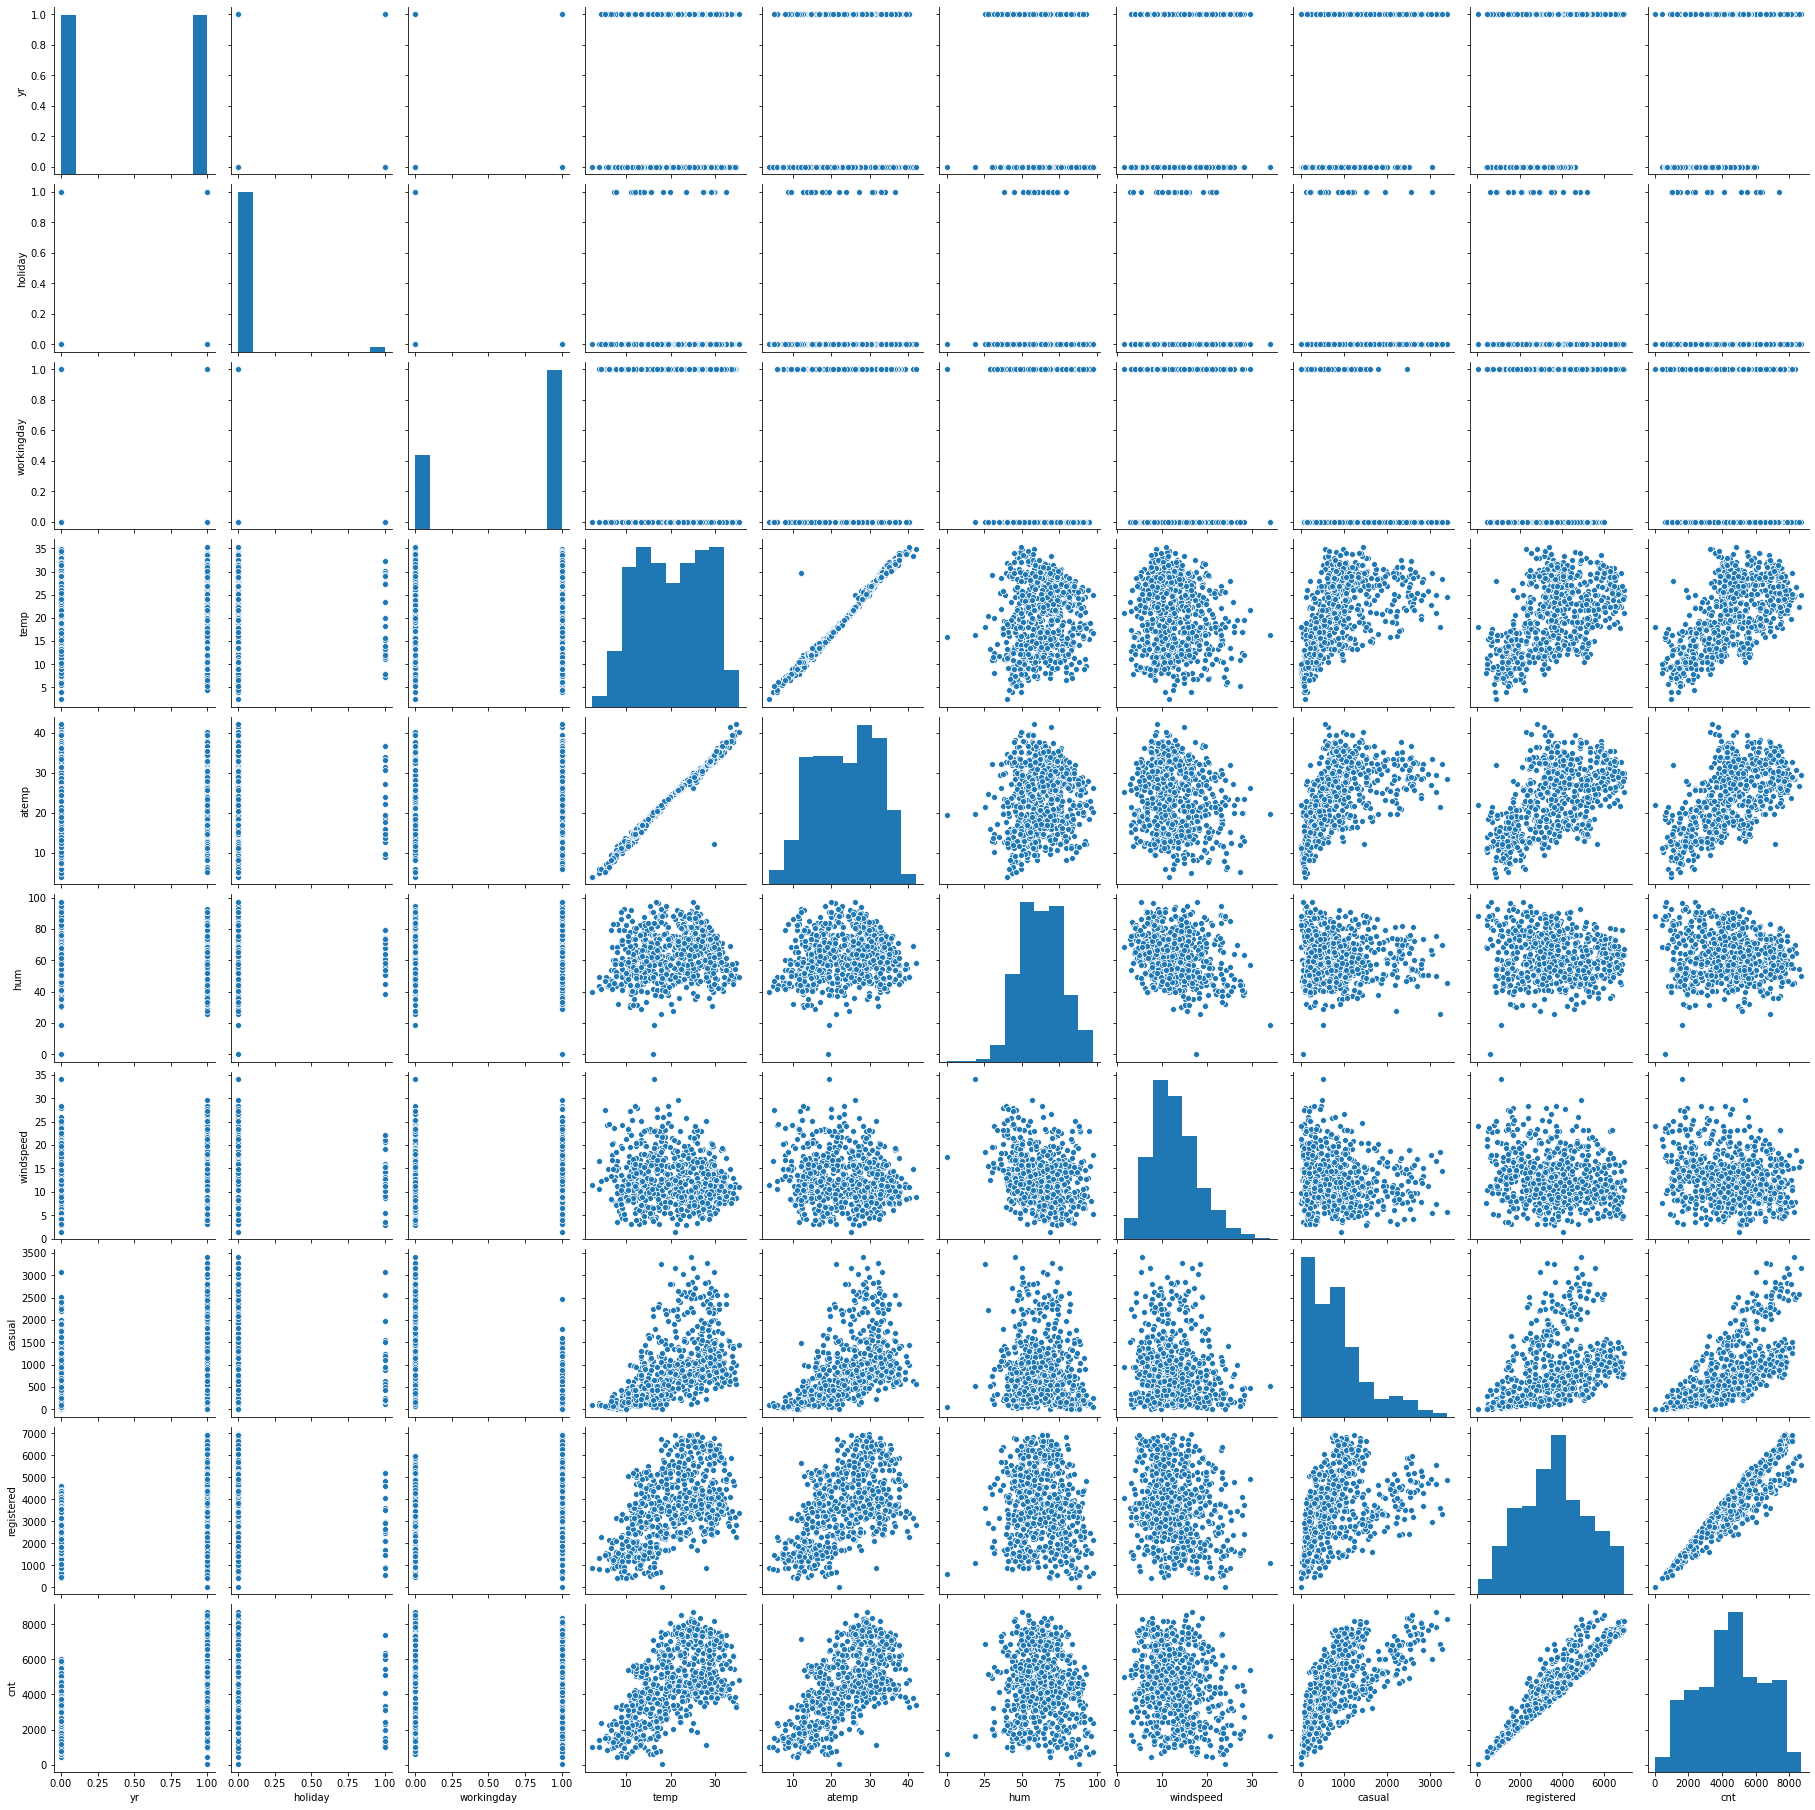

In [30]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(days_numeric)
plt.show()

#### It looks like cnt has fairly linear relationship with temp , atemp , windspeed, casual , registered etc.

In [31]:
days_numeric.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.002945  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.252948 -0.028764 -0.032703 -0.015662   
workingday -0.002945 -0.252948    1.000000  0.053470  0.052940  0.023202   
temp        0.048789 -0.028764    0.053470  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.052940  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.023202  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.018666 -0.158186 -0.183876 -0.248506   
casual      0.250502  0.054055   -0.517607  0.542731  0.543362 -0.075211   
registered  0.596911 -0.109142    0.305437  0.539436  0.543678 -0.089212   
cnt         0.569728 -0.068764    0.062542  0.627044  0.630685 -0.098543   

            windspeed    casual  registered       cnt  
yr          -0.011624  0.250502    0.596911  0.569728  
holiday      0.006257  0.054055   -0.109142 -0.068764  
workingday  -0.018666 -0.517607    0.305437  0.062542  
temp        -0.158186  0.542731    0.539436  0.627044  
atemp       -0.183876  0.543362    0.543678  0.630685  
hum         -0.248506 -0.075211   -0.089212 -0.098543  
windspeed    1.000000 -0.167995   -0.217914 -0.235132  
casual      -0.167995  1.000000    0.394137  0.672123  
registered  -0.217914  0.394137    1.000000  0.945411  
cnt         -0.235132  0.672123    0.945411  1.000000

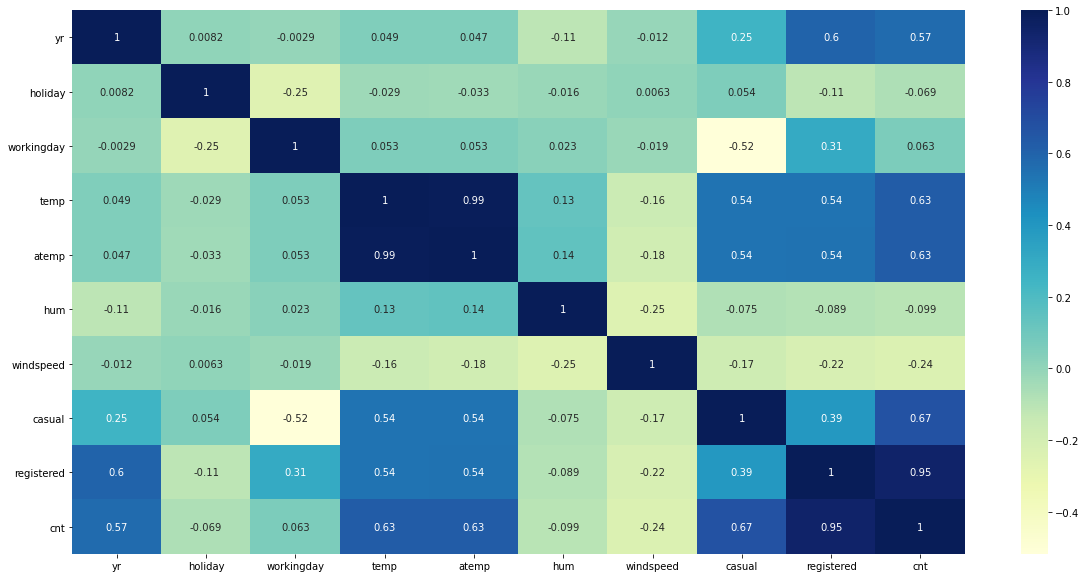

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(days_numeric.corr(), annot=True, cmap='YlGnBu')

#### cnt has significant correlation with yr,temp, casual , registered
#### The independent variables - temp , atemp etc are highly correlated. We need to check the multicolinearity eventually. 

- It's clear from the EDA that instant and the dteday are not the predictor for the cnt
- temp and atemp are highly correlated - as we can see them highly correlated to each other
- cnt= casual+ registered , this is not very useful in the model building
- Let's drop all of them from the analysis


In [33]:
days[(days.cnt-(days.casual+days.registered))!=0]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [34]:

df_bikes = days.drop(['atemp','instant','dteday','casual','registered'],axis=1)
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.4+ KB


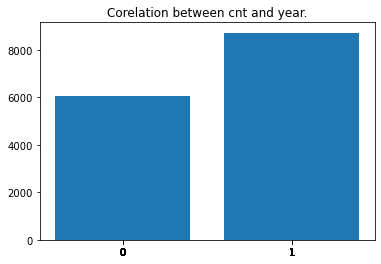

In [35]:
# plotting cnt vs year bar plot
plt.title('Corelation between cnt and year.')
plt.xticks(df_bikes.yr)
plt.bar(df_bikes.yr, df_bikes.cnt, width = .8)
plt.show()

#### It appears that bike sharing was getting popular in each year in the pre-COVID time.

## Find the correlation with Target Variable

In [36]:
np.abs(df_bikes.corr().cnt).sort_values(ascending=False)

cnt           1.000000
temp          0.627044
yr            0.569728
windspeed     0.235132
hum           0.098543
holiday       0.068764
workingday    0.062542
Name: cnt, dtype: float64

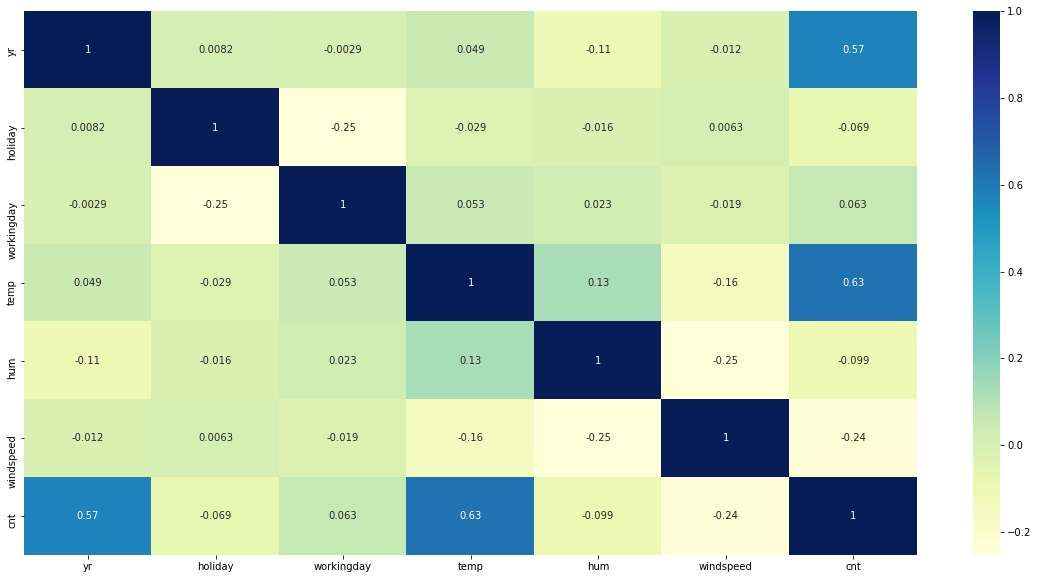

In [37]:
## Let's draw a heatmap for the data visualization
## heatmap of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df_bikes.corr(), annot=True, cmap='YlGnBu')
plt.show()


#### Let's check for outliers before moving to the data preparation

In [38]:
df_bikes.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

## 03. Data Preparation

#### Lets prepare the data before building the model

In [39]:
## subset all the categorical variables
bikes_categorical = df_bikes.select_dtypes(include=['object'])
bikes_categorical.head()

season mnth    weekday       weathersit
0  spring  Jan   Saturday  Mist and Cloudy
1  spring  Jan     Sunday  Mist and Cloudy
2  spring  Jan     Monday            Clear
3  spring  Jan    Tuesday            Clear
4  spring  Jan  Wednesday            Clear

In [40]:
## Convert into dummies
bike_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bike_dummies.head()

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  mnth_Feb  \
0              1              0              0         0         0         0   
1              1              0              0         0         0         0   
2              1              0              0         0         0         0   
3              1              0              0         0         0         0   
4              1              0              0         0         0         0   

   mnth_Jan  mnth_July  mnth_June  mnth_March  ...  mnth_Oct  mnth_Sep  \
0         1          0          0           0  ...         0         0   
1         1          0          0           0  ...         0         0   
2         1          0          0           0  ...         0         0   
3         1          0          0           0  ...         0         0   
4         1          0          0           0  ...         0         0   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
0               0                 1               0                 0   
1               0                 0               1                 0   
2               1                 0               0                 0   
3               0                 0               0                 0   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  weathersit_Light and Snow Rain  \
0                0                  0                               0   
1                0                  0                               0   
2                0                  0                               0   
3                1                  0                               0   
4                0                  1                               0   

   weathersit_Mist and Cloudy  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 22 columns]

In [41]:
## Drop categorical variable columns
df_bikes = df_bikes.drop(list(bikes_categorical.columns), axis=1)

In [42]:
df_bikes.shape

(730, 7)

In [43]:
## Concatenate the dummy variables with the main dataframe
df_bikes = pd.concat([df_bikes,bike_dummies],axis=1)
df_bikes.shape

(730, 29)

In [44]:
## Let's check the first few rows
df_bikes.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  \
0   0        0           0  14.110847  80.5833  10.749882   985   
1   0        0           0  14.902598  69.6087  16.652113   801   
2   0        0           1   8.050924  43.7273  16.636703  1349   
3   0        0           1   8.200000  59.0435  10.739832  1562   
4   0        0           1   9.305237  43.6957  12.522300  1600   

   season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
0              1              0              0  ...         0         0   
1              1              0              0  ...         0         0   
2              1              0              0  ...         0         0   
3              1              0              0  ...         0         0   
4              1              0              0  ...         0         0   

   weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
0               0                 1               0                 0   
1               0                 0               1                 0   
2               1                 0               0                 0   
3               0                 0               0                 0   
4               0                 0               0                 0   

   weekday_Tuesday  weekday_Wednesday  weathersit_Light and Snow Rain  \
0                0                  0                               0   
1                0                  0                               0   
2                0                  0                               0   
3                1                  0                               0   
4                0                  1                               0   

   weathersit_Mist and Cloudy  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 29 columns]

## 04. Model Building and Evaluation

#### The first step for the model building is to split the dataset into train-test split.

In [45]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_bikes, train_size=0.75, test_size=0.25, random_state=42)

In [46]:
# Let's check the train dataset
df_train.shape

(547, 29)

In [47]:
# Let's check the test dataset
df_test.shape

(183, 29)

In [48]:
df_bikes.shape

(730, 29)

In [49]:
def extract_numerical(df):
    continousVar=[]
    for i in df.columns:
        if df[i].nunique() > 2:
            continousVar.append(i)
    
    return continousVar

bikes_numeric = extract_numerical(df_bikes)
bikes_numeric

['temp', 'hum', 'windspeed', 'cnt']

## Scaling

We have our test train split. We need to scale the variables in the train data set for the better interpretability. 
Please note : We need to apply scaling on the continuous variables only.

In [50]:
# Import the MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()
df_train[bikes_numeric] = scaler.fit_transform(df_train[bikes_numeric])
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
653   1        0           1  0.509887  0.575354   0.400324  0.857540   
668   1        0           1  0.371783  0.686990   0.361366  0.619944   
694   1        0           1  0.316749  0.551739   0.060760  0.562115   
212   0        0           1  0.887856  0.567625   0.336444  0.462996   
18    0        0           1  0.290384  0.764351   0.465686  0.147169   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
653              0              0              1  ...         1         0   
668              0              0              1  ...         1         0   
694              0              0              1  ...         0         0   
212              0              0              0  ...         0         0   
18               1              0              0  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
653               0                 0               0                 0   
668               0                 0               0                 0   
694               1                 0               0                 0   
212               1                 0               0                 0   
18                0                 0               0                 0   

     weekday_Tuesday  weekday_Wednesday  weathersit_Light and Snow Rain  \
653                1                  0                               0   
668                0                  1                               0   
694                0                  0                               0   
212                0                  0                               0   
18                 0                  1                               0   

     weathersit_Mist and Cloudy  
653                           0  
668                           1  
694                           0  
212                           0  
18                            1  

[5 rows x 29 columns]

In [51]:
df_train[bikes_numeric].describe()

temp         hum   windspeed         cnt
count  547.000000  547.000000  547.000000  547.000000
mean     0.550966    0.654501    0.412738    0.497313
std      0.226883    0.145744    0.185512    0.234390
min      0.000000    0.000000    0.000000    0.000000
25%      0.354740    0.542022    0.280385    0.342690
50%      0.574266    0.657792    0.381621    0.501509
75%      0.744560    0.757509    0.521811    0.676868
max      1.000000    1.000000    1.000000    1.000000

In [52]:
# Split the train dataset into X and y

y_train = df_train.pop('cnt')
X_train = df_train
X_train.shape

(547, 28)

## Building First Model with all the features

In [53]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
## Print coefficients
print(lm.coef_)

[ 2.40270495e-01  1.90639708e+11  1.90639708e+11  4.42317963e-01
 -1.59851074e-01 -1.20307922e-01 -1.43297195e-01  4.44412231e-03
  7.49359131e-02 -1.84974670e-02 -4.69970703e-02  5.94329834e-03
 -1.06239319e-02 -5.31120300e-02  6.82449341e-03  4.66232300e-02
  3.13334465e-02 -5.72204590e-02  3.46641541e-02  7.07931519e-02
 -2.21862793e-02  1.90639708e+11  1.90639708e+11 -1.19819641e-02
 -2.32944489e-02 -9.79614258e-03 -2.30506897e-01 -5.86242676e-02]


In [55]:
## Print intercepts
print(lm.intercept_)

-190639707610.80206


## Building Model with RFE - Recursive feature elimination

**We have close to 29 features. It will be very time consuming to eliminate the features manually. Let's apply RFE to shortlist the feature. Let's select 15 arbitary feature for analysis initially.**

In [56]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 13),
 ('mnth_Jan', False, 7),
 ('mnth_July', True, 1),
 ('mnth_June', False, 12),
 ('mnth_March', False, 3),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', False, 2),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 10),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light and Snow Rain', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [57]:
## selcting top  columns selected by rfe
col = X_train.columns[rfe1.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Nov',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light and Snow Rain',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [58]:
## columns rejec
X_train.columns[~rfe1.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

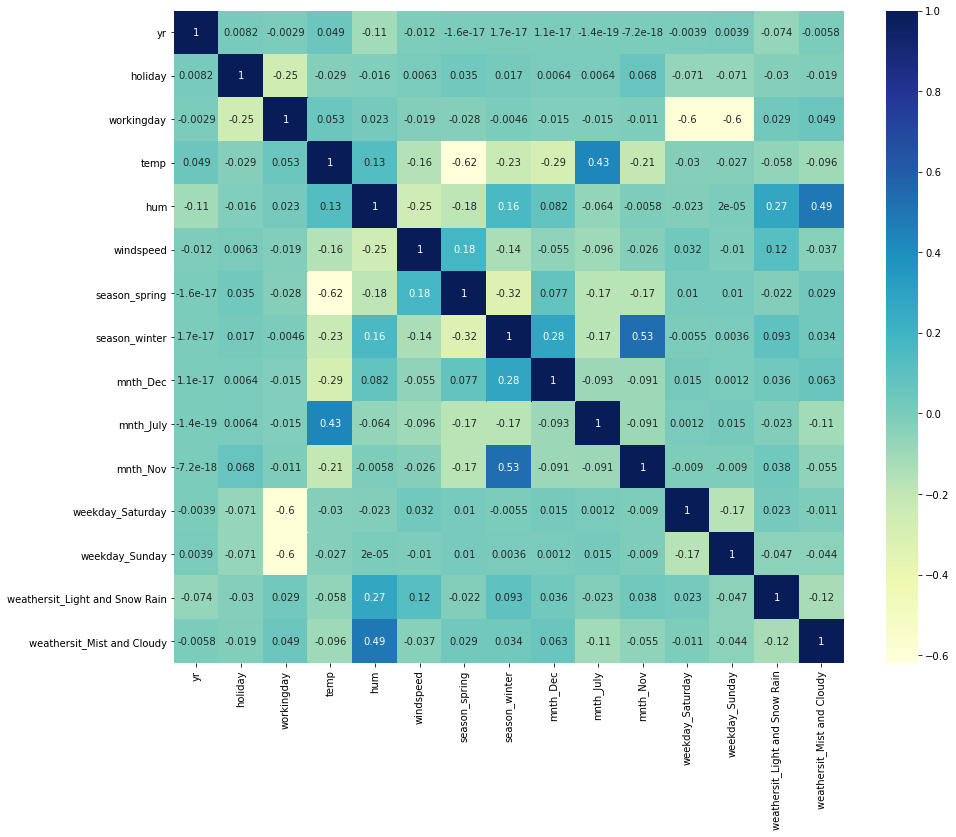

In [59]:
## checking correlation of selected col
plt.figure(figsize=(15,12))
sns.heatmap(df_bikes[col].corr(), annot=True, cmap='YlGnBu')
plt.show()

### Build model and evaluation with statsmodels

In [60]:
# Import statsmodels
import statsmodels.api as sm  

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  yr  holiday  workingday      temp       hum  windspeed  \
653    1.0   1        0           1  0.509887  0.575354   0.400324   
668    1.0   1        0           1  0.371783  0.686990   0.361366   
694    1.0   1        0           1  0.316749  0.551739   0.060760   
212    1.0   0        0           1  0.887856  0.567625   0.336444   
18     1.0   0        0           1  0.290384  0.764351   0.465686   

     season_spring  season_winter  mnth_Dec  mnth_July  mnth_Nov  \
653              0              1         0          0         0   
668              0              1         0          0         0   
694              0              1         0          0         1   
212              0              0         0          0         0   
18               1              0         0          0         0   

     weekday_Saturday  weekday_Sunday  weathersit_Light and Snow Rain  \
653                 0               0                               0   
668                 0               0                               0   
694                 0               0                               0   
212                 0               0                               0   
18                  0               0                               0   

     weathersit_Mist and Cloudy  
653                           0  
668                           1  
694                           0  
212                           0  
18                            1

In [61]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          1.71e-200
Time:                        03:17:33   Log-Likelihood:                 517.54
No. Observations:                 547   AIC:                            -1005.
Df Residuals:                     532   BIC:                            -940.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                       workingday  49.52
12                  weekday_Sunday  12.07
11                weekday_Saturday  11.02
3                             temp   3.48
1                          holiday   3.12
6                    season_spring   2.82
7                    season_winter   2.25
4                              hum   1.89
10                        mnth_Nov   1.73
14      weathersit_Mist and Cloudy   1.58
9                        mnth_July   1.33
13  weathersit_Light and Snow Rain   1.30
8                         mnth_Dec   1.29
5                        windspeed   1.20
0                               yr   1.03

#### workingday has a high p-value and high VIF values. Let's remove it from the model.

In [63]:
X_train_rfe1.drop('workingday', axis=1, inplace=True)
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          1.21e-200
Time:                        03:17:33   Log-Likelihood:                 517.91
No. Observations:                 547   AIC:                            -1006.
Df Residuals:                     532   BIC:                            -941.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                              hum  24.12
2                             temp  16.81
4                        windspeed   5.08
6                    season_winter   2.82
5                    season_spring   2.60
13      weathersit_Mist and Cloudy   2.24
0                               yr   2.08
9                         mnth_Nov   1.84
8                        mnth_July   1.46
7                         mnth_Dec   1.38
12  weathersit_Light and Snow Rain   1.27
11                  weekday_Sunday   1.24
10                weekday_Saturday   1.21
1                          holiday   1.06

#### weekday_Saturday has a high p-value. Let's remove it from the model.

In [65]:
X_train_rfe1.drop('weekday_Saturday', axis=1, inplace=True)
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     214.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          8.69e-202
Time:                        03:17:33   Log-Likelihood:                 517.83
No. Observations:                 547   AIC:                            -1008.
Df Residuals:                     533   BIC:                            -947.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                              hum  23.99
2                             temp  16.80
4                        windspeed   5.03
6                    season_winter   2.82
5                    season_spring   2.60
12      weathersit_Mist and Cloudy   2.24
0                               yr   2.08
9                         mnth_Nov   1.84
8                        mnth_July   1.46
7                         mnth_Dec   1.37
11  weathersit_Light and Snow Rain   1.27
10                  weekday_Sunday   1.20
1                          holiday   1.06

#### hum has very high VIF. Let's remove it from the model

In [67]:
X_train_rfe1.drop('hum', axis=1, inplace=True)
lm4 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     225.1
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          6.41e-200
Time:                        03:17:33   Log-Likelihood:                 510.59
No. Observations:                 547   AIC:                            -995.2
Df Residuals:                     534   BIC:                            -939.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  5.04
3                        windspeed  5.00
5                    season_winter  2.44
0                               yr  2.07
8                         mnth_Nov  1.81
4                    season_spring  1.72
11      weathersit_Mist and Cloudy  1.56
7                        mnth_July  1.39
6                         mnth_Dec  1.33
9                   weekday_Sunday  1.19
10  weathersit_Light and Snow Rain  1.10
1                          holiday  1.06

#### temp has the border line VIF. Let's drop it.

In [69]:
X_train_rfe2=X_train_rfe1.drop('temp', axis=1)
lm5 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          9.36e-171
Time:                        03:17:33   Log-Likelihood:                 438.81
No. Observations:                 547   AIC:                            -853.6
Df Residuals:                     535   BIC:                            -802.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [70]:
# calculating VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe2.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        windspeed  2.79
4                    season_winter  2.42
0                               yr  1.87
7                         mnth_Nov  1.77
3                    season_spring  1.55
10      weathersit_Mist and Cloudy  1.51
5                         mnth_Dec  1.31
8                   weekday_Sunday  1.19
6                        mnth_July  1.14
9   weathersit_Light and Snow Rain  1.10
1                          holiday  1.05

#### When we drop temperature there is a drop in r2_score by more than 5%. Hence Let's keep the temperature in the model and remove windspeed itself.

In [71]:
X_train_rfe1.drop('windspeed', axis=1, inplace=True)
lm6 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     236.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          3.97e-197
Time:                        03:17:33   Log-Likelihood:                 501.14
No. Observations:                 547   AIC:                            -978.3
Df Residuals:                     535   BIC:                            -926.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_vif = X_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                             temp  2.81
4                    season_winter  2.43
0                               yr  2.07
7                         mnth_Nov  1.76
10      weathersit_Mist and Cloudy  1.55
6                        mnth_July  1.35
3                    season_spring  1.33
5                         mnth_Dec  1.32
8                   weekday_Sunday  1.18
9   weathersit_Light and Snow Rain  1.07
1                          holiday  1.06

## 05. Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [73]:
y_train_cnt = lm6.predict(X_train_rfe1)

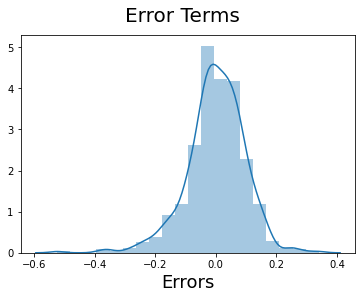

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

## 06. Making predictions

In [75]:
## Performing scaling on test numeric data
bikes_numeric

['temp', 'hum', 'windspeed', 'cnt']

In [76]:
# Fitting on dataset
df_test[bikes_numeric] = scaler.transform(df_test[bikes_numeric])
df_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  \
468   1        0           0  0.543115  0.518248   0.422104  0.848606   
148   0        0           0  0.758058  0.843709   0.479765  0.526017   
302   0        0           0  0.324018  0.642765   0.386287  0.350115   
355   0        0           1  0.453814  0.780592   0.062325  0.318363   
515   1        0           1  0.773634  0.507943   0.433030  0.833877   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
468              0              1              0  ...         0         0   
148              0              1              0  ...         0         0   
302              0              0              1  ...         1         0   
355              1              0              0  ...         0         0   
515              0              1              0  ...         0         0   

     weekday_Monday  weekday_Saturday  weekday_Sunday  weekday_Thrusday  \
468               0                 1               0                 0   
148               0                 0               1                 0   
302               0                 0               1                 0   
355               0                 0               0                 1   
515               0                 0               0                 1   

     weekday_Tuesday  weekday_Wednesday  weathersit_Light and Snow Rain  \
468                0                  0                               0   
148                0                  0                               0   
302                0                  0                               0   
355                0                  0                               0   
515                0                  0                               0   

     weathersit_Mist and Cloudy  
468                           0  
148                           0  
302                           0  
355                           1  
515                           0  

[5 rows x 29 columns]

In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
# Now let's use the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
# Making Prediction
y_pred = lm6.predict(X_test_new)

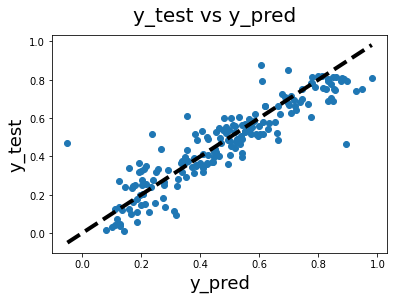

In [87]:
# Plotting y_test and y_pred to understand the spread

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
fig.suptitle('y_test vs y_pred', fontsize = 20)   
ax.set_xlabel('y_pred' , fontsize=18)
ax.set_ylabel('y_test'  , fontsize=18)
plt.show()

In [81]:

from sklearn.metrics import r2_score
r_squared=r2_score(y_test, y_pred)
r_squared

0.8100590176316969

In [82]:
# Calculating Adjusted R2-sore
Adj_r2 = 1-(1-r_squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test_new.shape[1]-1)
Adj_r2

0.7966514188762872

In [83]:
# Looking at RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.10071505212800835

In [86]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     236.0
Date:                Tue, 25 Aug 2020   Prob (F-statistic):          3.97e-197
Time:                        03:18:04   Log-Likelihood:                 501.14
No. Observations:                 547   AIC:                            -978.3
Df Residuals:                     535   BIC:                            -926.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<b><i>cnt = 0.2046 + 0.2467 X yr -0.0875 X holiday +  0.4415 X temp  -0.1515 X season_spring + 0.0937 X season_winter -0.0753 X mnth_Dec -0.0631 X mnth_July -0.0922 X mnth_Nov -0.0465 X weekday_Sunday -0.2855 X weathersit_Light and Snow Rain  -0.0833 X weathersit_Mist and Cloudy</i></b>

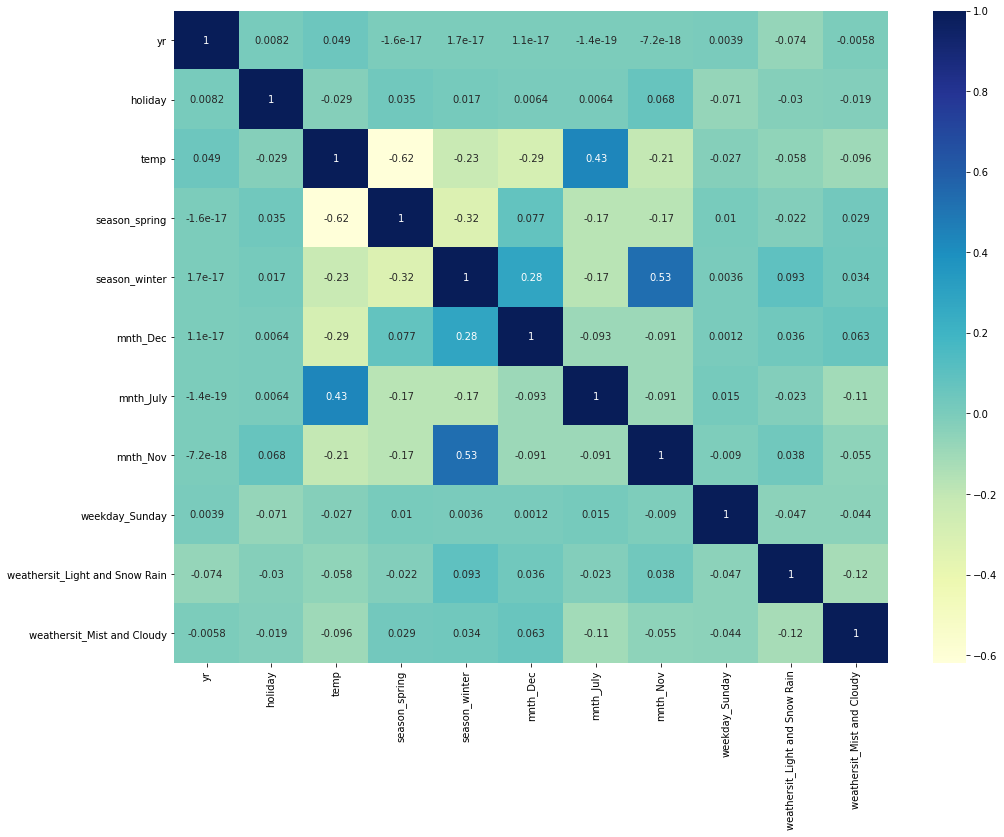

In [85]:
# Figure size
plt.figure(figsize=(16,12))

# Heatmap
sns.heatmap(df_bikes[X_train_vif.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Final Results

#### Final Model - lm 6

**Total variable used : 11**

**On Train set**

    - R2 score = 82.9%
    - Adjusted R2 = 82.6%

**On Test set**

    - R2 score = 81%
    - Adjusted R2 = 79.66%





### Recommendations
 - Boombikes should focus on temperature
 - Boombike should consider the light and snowy weather